In [1]:
import os
print(os.getcwd())

/Users/jeremyliu/W207/FinalProject/w207-predictive-maintenance/notebooks


In [2]:
# Data Ingestion

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Read the CSV file
df = pd.read_csv('../data/raw/ai4i2020.csv')

# Display the first 5 rows
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# Drop only identifiers and failure subtypes
X = df.drop(['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y = df['Machine failure']

# One-hot encode Type (categorical)
X = pd.get_dummies(X, columns=['Type'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

In [4]:
# Builds baseline binary classification model

# Create a pipeline with scaling and logistic regression
baseline_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(class_weight='balanced', random_state=123))
])

# Fit model
baseline_model.fit(X_train, y_train)

,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1932
           1       0.12      0.78      0.22        68

    accuracy                           0.81      2000
   macro avg       0.56      0.79      0.55      2000
weighted avg       0.96      0.81      0.87      2000

ROC-AUC: 0.9038028254780173


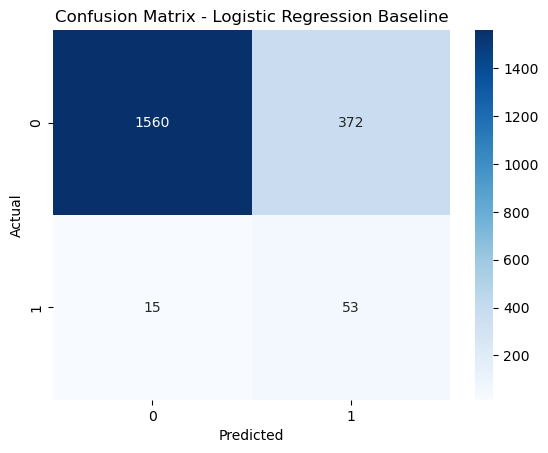

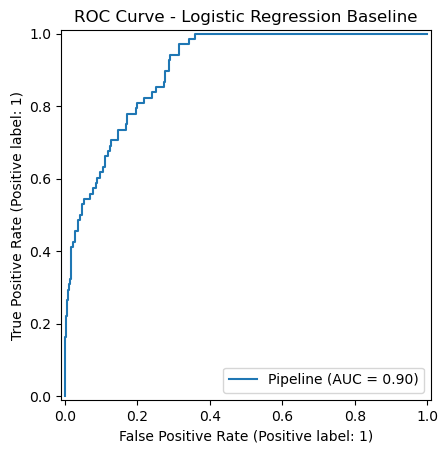

In [5]:
# Evaluate model

# Predictions
y_pred = baseline_model.predict(X_test)
y_proba = baseline_model.predict_proba(X_test)[:, 1]

# Performance metrics
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression Baseline")
plt.show()

# ROC curve
RocCurveDisplay.from_estimator(baseline_model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression Baseline")
plt.show()

In [6]:
# Majority class baseline

majority_class = df['Machine failure'].value_counts().idxmax()
majority_count = df['Machine failure'].value_counts().max()
total_count = len(df)
baseline_accuracy = majority_count / total_count

print(f"Majority class: {majority_class} (0 = No failure, 1 = Failure)")
print(f"Baseline accuracy: {baseline_accuracy:.3f}")

Majority class: 0 (0 = No failure, 1 = Failure)
Baseline accuracy: 0.966
